In [68]:
import tensorflow_hub as hub
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np


In [32]:
model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

In [33]:
def load_image(path):
    img = tf.io.read_file(path)
    img = tf.image.decode_image(img, channels = 3)
    img = tf.image.convert_image_dtype(img, tf.float32)
    img = img[tf.newaxis, :]
    return img

In [61]:
content = load_image('../go_web/client_upload/yo.jpeg')
style = load_image('../go_web/artworks/swing.jpg')

In [62]:
stylized_image = model(tf.constant(content), tf.constant(style))[0]

In [63]:
type(stylized_image)

tensorflow.python.framework.ops.EagerTensor

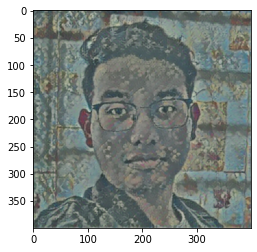

In [64]:
plt.imshow(np.squeeze(stylized_image))
plt.show()

In [67]:
import tensorflow.keras.utils
processed_path = '../go_web/processed_image' + '/test.png'
tf.keras.preprocessing.image.save_img(processed_path, tf.squeeze(stylized_image), data_format='channels_last', file_format='png', scale=True)